# Importing libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)
pd.set_option('display.width', 1000)
from jupyterthemes import jtplot
%matplotlib inline
jtplot.style()

In [2]:
import pyreadstat
dtafile = './working_with_data.dta'

In [3]:
df, meta = pyreadstat.read_dta(dtafile)

In [4]:
meta.value_labels

{'hostel': {28: 'Red Hostel',
  31: 'Blue Hostel',
  33: 'Yellow Hostel',
  46: 'Green Hostel',
  61: 'Purple Hostel'}}

In [5]:
df

,state,floor,room,empcode,hostel,card_number,m_health,educ_standard,income,treatment
0,Karnataka,0.0,6.0,2.021610e+07,31.0,6.001322e+07,15.0,7.0,37488.667004,1.0
1,Karnataka,1.0,9.0,2.037530e+07,28.0,6.022154e+07,NaN,8.0,36193.732761,1.0
2,Karnataka,1.0,14.0,2.024461e+07,31.0,6.004956e+07,4.0,10.0,29309.518389,1.0
3,Karnataka,0.0,10.0,2.023884e+07,31.0,6.004278e+07,7.0,10.0,37583.103932,1.0
4,Karnataka,3.0,20.0,2.015258e+07,28.0,5.243690e+05,10.0,10.0,35087.144371,0.0
...,...,...,...,...,...,...,...,...,...,...
351,Odisha,4.0,409.0,2.255189e+07,33.0,6.278446e+07,NaN,9.0,39899.777800,0.0
352,Odisha,3.0,20.0,2.279604e+07,28.0,6.248399e+07,10.0,10.0,28738.291129,0.0
353,Odisha,1.0,13.0,2.247466e+07,31.0,6.249702e+07,8.0,9.0,38016.144220,1.0
354,Odisha,3.0,19.0,2.278762e+07,28.0,6.247238e+07,5.0,10.0,32688.774940,1.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356 entries, 0 to 355
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   state          356 non-null    object 
 1   floor          297 non-null    float64
 2   room           297 non-null    float64
 3   empcode        356 non-null    float64
 4   hostel         297 non-null    float64
 5   card_number    356 non-null    float64
 6   m_health       295 non-null    float64
 7   educ_standard  333 non-null    float64
 8   income         356 non-null    float64
 9   treatment      356 non-null    float64
dtypes: float64(9), object(1)
memory usage: 27.9+ KB


# Data Cleaning

## Drop card_number and factory
Factory variable isn't present

In [7]:
df.drop('card_number', axis = 1, inplace = True)

## Filtering data for Karnataka

In [8]:
df = df[df.state == 'Karnataka']

In [9]:
df.head()

,state,floor,room,empcode,hostel,m_health,educ_standard,income,treatment
0,Karnataka,0.0,6.0,20216096.0,31.0,15.0,7.0,37488.667004,1.0
1,Karnataka,1.0,9.0,20375302.0,28.0,NaN,8.0,36193.732761,1.0
2,Karnataka,1.0,14.0,20244610.0,31.0,4.0,10.0,29309.518389,1.0
3,Karnataka,0.0,10.0,20238843.0,31.0,7.0,10.0,37583.103932,1.0
4,Karnataka,3.0,20.0,20152584.0,28.0,10.0,10.0,35087.144371,0.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169 entries, 0 to 168
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   state          169 non-null    object 
 1   floor          140 non-null    float64
 2   room           140 non-null    float64
 3   empcode        169 non-null    float64
 4   hostel         140 non-null    float64
 5   m_health       141 non-null    float64
 6   educ_standard  158 non-null    float64
 7   income         169 non-null    float64
 8   treatment      169 non-null    float64
dtypes: float64(8), object(1)
memory usage: 13.2+ KB


In [11]:
#Hostel has 5 unique values and some null values
df.hostel.value_counts()

33.0    43
31.0    27
28.0    26
46.0    25
61.0    19
Name: hostel, dtype: int64

In [12]:
#green hostel
green = df[df.hostel == 46]

In [13]:
green.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 25 to 163
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   state          25 non-null     object 
 1   floor          25 non-null     float64
 2   room           25 non-null     float64
 3   empcode        25 non-null     float64
 4   hostel         25 non-null     float64
 5   m_health       19 non-null     float64
 6   educ_standard  22 non-null     float64
 7   income         25 non-null     float64
 8   treatment      25 non-null     float64
dtypes: float64(8), object(1)
memory usage: 2.0+ KB


In [14]:
green

,state,floor,room,empcode,hostel,m_health,educ_standard,income,treatment
25,Karnataka,4.0,31.0,20303466.0,46.0,4.0,11.0,25490.140013,0.0
35,Karnataka,1.0,8.0,20281830.0,46.0,5.0,10.0,29173.929881,0.0
36,Karnataka,3.0,22.0,20287603.0,46.0,3.0,NaN,26458.077103,0.0
39,Karnataka,2.0,14.0,20279733.0,46.0,1.0,10.0,25300.734218,0.0
44,Karnataka,1.0,7.0,20286884.0,46.0,0.0,7.0,24807.118844,0.0
47,Karnataka,3.0,22.0,20288385.0,46.0,NaN,10.0,31613.898281,1.0
58,Karnataka,1.0,8.0,20281843.0,46.0,1.0,10.0,35228.837069,0.0
61,Karnataka,3.0,19.0,20286913.0,46.0,4.0,7.0,28178.111803,0.0
62,Karnataka,2.0,17.0,20308867.0,46.0,3.0,10.0,25151.378214,1.0
63,Karnataka,2.0,17.0,20308938.0,46.0,9.0,10.0,36216.861345,1.0


In [15]:
#12 rooms are mentioned in data
len(green.room.value_counts())

12

In [16]:
green.groupby(by = 'room').empcode.count().sort_values(ascending = False)

room
17.0    4
19.0    4
22.0    4
8.0     3
14.0    2
31.0    2
7.0     1
9.0     1
21.0    1
25.0    1
29.0    1
30.0    1
Name: empcode, dtype: int64

In [17]:
green.groupby(by = 'floor').room.count().sort_values(ascending = False)

floor
3.0    10
2.0     6
1.0     5
4.0     4
Name: room, dtype: int64

In [18]:
green.groupby(by = 'floor').empcode.count().sort_values(ascending = False).mean()

6.25

# Green Hostel

6 Null values in m_health variable

12 rooms in the hostel

Maximum 4 individuals in rooms 17,19,22

Floor 4 has only 4 rooms = lowest number of rooms

6.25 people per floor on an average

In [19]:
df.head()

,state,floor,room,empcode,hostel,m_health,educ_standard,income,treatment
0,Karnataka,0.0,6.0,20216096.0,31.0,15.0,7.0,37488.667004,1.0
1,Karnataka,1.0,9.0,20375302.0,28.0,NaN,8.0,36193.732761,1.0
2,Karnataka,1.0,14.0,20244610.0,31.0,4.0,10.0,29309.518389,1.0
3,Karnataka,0.0,10.0,20238843.0,31.0,7.0,10.0,37583.103932,1.0
4,Karnataka,3.0,20.0,20152584.0,28.0,10.0,10.0,35087.144371,0.0


In [20]:
df.educ_standard.value_counts()

10.0    83
9.0     23
12.0    17
7.0     10
11.0     9
8.0      8
5.0      4
6.0      3
4.0      1
Name: educ_standard, dtype: int64

Text(0, 0.5, 'Count')

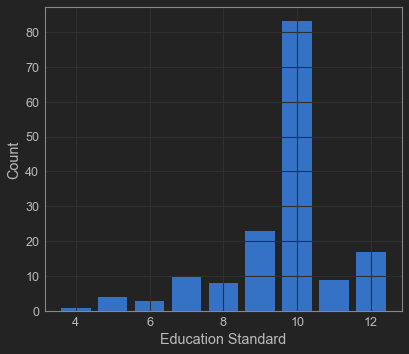

In [21]:
#plt.hist(df.educ_standard, edgecolor = 'black')
#sns.countplot(df.educ_standard)
plt.bar(df.educ_standard.value_counts().index,df.educ_standard.value_counts().values)

plt.xlabel('Education Standard')

plt.ylabel('Count')

Education level 4 appears least frequently

Barplot by using value_counts seems to be a better graph than histogram or countplot

# Ques 8

In [22]:
df.head()

,state,floor,room,empcode,hostel,m_health,educ_standard,income,treatment
0,Karnataka,0.0,6.0,20216096.0,31.0,15.0,7.0,37488.667004,1.0
1,Karnataka,1.0,9.0,20375302.0,28.0,NaN,8.0,36193.732761,1.0
2,Karnataka,1.0,14.0,20244610.0,31.0,4.0,10.0,29309.518389,1.0
3,Karnataka,0.0,10.0,20238843.0,31.0,7.0,10.0,37583.103932,1.0
4,Karnataka,3.0,20.0,20152584.0,28.0,10.0,10.0,35087.144371,0.0


In [23]:
#Removing other columns as they're not required
df = df[['m_health', 'treatment', 'income']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169 entries, 0 to 168
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   m_health   141 non-null    float64
 1   treatment  169 non-null    float64
 2   income     169 non-null    float64
dtypes: float64(3)
memory usage: 5.3 KB


In [24]:
#Removing rows with null values
df = df[~df.m_health.isnull()]

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141 entries, 0 to 167
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   m_health   141 non-null    float64
 1   treatment  141 non-null    float64
 2   income     141 non-null    float64
dtypes: float64(3)
memory usage: 4.4 KB


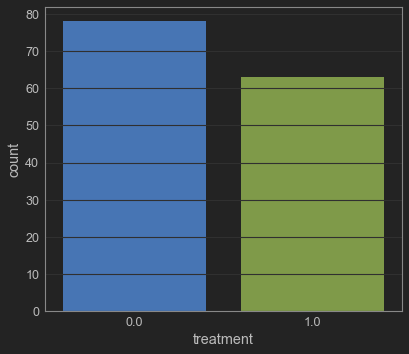

In [26]:
sns.countplot(df.treatment)
plt.show()

In [27]:
df.treatment.value_counts()

0.0    78
1.0    63
Name: treatment, dtype: int64

63 Participants in treatment group vs 78 in control group

In [35]:
def q25(x):
    return x.quantile(0.25)

def q75(x):
    return x.quantile(0.75)

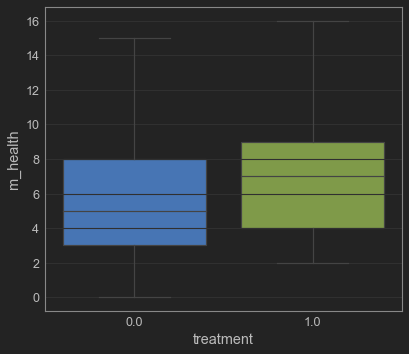

In [28]:
sns.boxplot(data = df, x = 'treatment', y = 'm_health')
plt.show()

Treatment seems to have enhanced mental health of subjects

In [31]:
df.groupby('treatment')['m_health'].agg([np.min, q25,np.mean, np.median, q75, np.max])

,amin,q25,mean,median,q75,amax
treatment,,,,,,
0.0,0.0,3.0,5.243590,5.0,8.0,15.0
1.0,2.0,4.0,7.174603,7.0,9.0,16.0


In [32]:
100*(7-5)/5 

40.0

40% increase on average in mental health of subjects

In [37]:
#income to be classified into 3 categories - low (below 30,000), middle (30,000-35,000) and high (above 35,000)

df['Income_bucket'] = pd.cut(df.income, [0, 30000,35000, 999999], labels = ['low', 'middle', "high"])

In [38]:
df

,m_health,treatment,income,Income_bucket
0,15.0,1.0,37488.667004,high
2,4.0,1.0,29309.518389,low
3,7.0,1.0,37583.103932,high
4,10.0,0.0,35087.144371,high
5,6.0,0.0,39259.152167,high
6,8.0,1.0,37749.003828,high
7,4.0,0.0,30567.680061,middle
8,8.0,0.0,38192.472223,high
9,7.0,1.0,30744.804673,middle
10,5.0,1.0,36616.476070,high


In [39]:
df.drop('income', axis = 1, inplace = True)

In [42]:
result = pd.pivot_table(data = df, index = 'Income_bucket', columns = 'treatment', values = 'm_health', aggfunc = np.mean)
result

treatment,0.0,1.0
Income_bucket,,
low,4.689655,6.600000
middle,5.285714,7.611111
high,5.952381,7.320000


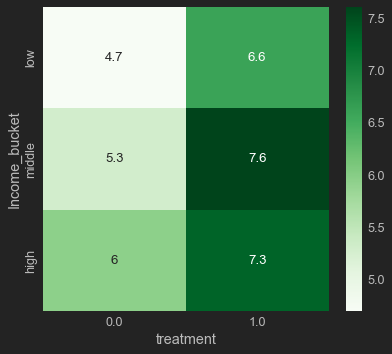

In [44]:
sns.heatmap(result, cmap = 'Greens', annot = True)
plt.show()